Q1:

b0 = -6

b1 = .5

b2 = 1

x1 = 3

x2 = 3.5

z = -6+1.5+3.5 = -1

sigmoid(z) = 1/(1+e^-z) = 0.27

Q2:

2 = 1 + e^-z

1 = e^-z

z= b0 + b1 * x1 + b2 * x2

0 = -6 + .5*x1 + 1 * 3.5

x1 = 2.5 / 0.5 = 5

Q3:
* Decision boundary is the line X2 = 6: data points with X2 > 6 will be classified as Y = O and data points with x2 < 6 will be classified as Y = 1.

Q4:
* The cost function J (B) for logistic regression is convex, so any local minimum is a global minimum.
* The MLE of B, i.e., the minimizer of J (B), may not exist.
* The cost function J (B) for logistic regression is always non-negative.

Q5: 22

Q6: 48

Q7: 0.741

Q8: 17

Q9: 16

Q10: 51

Q11: 0.735

Q12: 6

Q13: 8

Q14: 58

Q15: 0.741

Q16: 27

Q17: 6

Q18: 59

Q19: 0.746



In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import metrics
from sklearn.metrics import roc_auc_score

from ISLP.models import (ModelSpec as MS,
                         summarize)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data"
#df = pd.read_csv(url, index_col=0)

url = "Caravan.csv"
df = pd.read_csv(url)

df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [4]:
X_all = df.drop(['Purchase'], axis=1)
#X_all = sm.add_constant(X)

allvars = X_all.columns
design = MS(allvars)
X_all = design.fit_transform(X_all)

X_all

,intercept,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,1.0,33,1,3,2,8,0,5,1,3,...,0,0,0,0,1,0,0,0,0,0
1,1.0,37,1,2,2,8,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
2,1.0,37,1,2,2,8,0,4,2,4,...,0,0,0,0,1,0,0,0,0,0
3,1.0,9,1,3,3,3,2,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,1.0,40,1,4,2,10,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1.0,36,1,1,2,8,0,6,1,2,...,2,0,0,0,1,0,0,0,0,0
5818,1.0,35,1,4,4,8,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
5819,1.0,33,1,3,4,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
5820,1.0,34,1,3,2,8,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_all = (df.Purchase == "Yes").astype('int')
#y_all = y_all.values.reshape(-1,1)



In [6]:
X_test = X_all.iloc[0:1000, :]
y_test = y_all[0:1000]


In [7]:
X = X_all.iloc[1000:, :]
y = y_all[1000:]


In [8]:
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Purchase   No. Observations:                 4822
Model:                            GLM   Df Residuals:                     4736
Model Family:                Binomial   Df Model:                           85
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -925.89
Date:                Fri, 24 Nov 2023   Deviance:                       1851.8
Time:                        23:12:52   Pearson chi2:                 4.49e+03
No. Iterations:                    25   Pseudo R-squ. (CS):            0.06718
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    402.3452   6.61e+05      0.001      1.000   -1.29e+06     1.3e+06
MOSTYPE        0.0830      0.051      1.639      0.101      -0.016       0.182
MAANTHUI      -0.2138      0.209     -1.021      0.307      -0.624       0.196
MGEMOMV        0.1015      0.153      0.665      0.506      -0.198       0.401
MGEMLEEF       0.2661      0.113      2.361      0.018       0.045       0.487
MOSHOOFD      -0.3601      0.228     -1.583      0.113      -0.806       0.086
MGODRK        -0.0458      0.115     -0.396      0.692      -0.272       0.180
MGODPR         0.0143      0.128      0.112      0.911      -0.236       0.264
MGODOV         0.0694      0.115      0.606      0.545      -0.155       0.294
MGODGE        -0.0421      0.120     -0.351      0.726      -0.278       0.193
MRELGE         0.1674      0.175      0.956      0.339      -0.176       0.510
MRELSA         0.0218      0.164      0.134      0.894      -0.299       0.342
MRELOV         0.0666      0.174      0.383      0.702      -0.274       0.407
MFALLEEN      -0.0731      0.144     -0.509      0.611      -0.355       0.208
MFGEKIND      -0.1209      0.147     -0.824      0.410      -0.408       0.167
MFWEKIND      -0.1192      0.155     -0.767      0.443      -0.424       0.186
MOPLHOOG       0.0098      0.145      0.068      0.946      -0.274       0.294
MOPLMIDD      -0.0364      0.150     -0.242      0.809      -0.331       0.258
MOPLLAAG      -0.1949      0.151     -1.291      0.197      -0.491       0.101
MBERHOOG       0.1280      0.101      1.266      0.206      -0.070       0.326
MBERZELF       0.0775      0.108      0.720      0.472      -0.134       0.288
MBERBOER      -0.0576      0.119     -0.485      0.628      -0.290       0.175
MBERMIDD       0.1428      0.099      1.436      0.151      -0.052       0.338
MBERARBG       0.0586      0.100      0.588      0.557      -0.137       0.254
MBERARBO       0.1080      0.099      1.091      0.275      -0.086       0.302
MSKA          -0.0308      0.114     -0.270      0.787      -0.254       0.192
MSKB1         -0.0641      0.110     -0.580      0.562      -0.281       0.152
MSKB2         -0.0361      0.099     -0.364      0.716      -0.231       0.159
MSKC           0.0637      0.110      0.581      0.561      -0.151       0.279
MSKD          -0.0095      0.107     -0.089      0.929      -0.219       0.200
MHHUUR       -22.8325   4.84e+04     -0.000      1.000    -9.5e+04    9.49e+04
MHKOOP       -22.8074   4.84e+04     -0.000      1.000    -9.5e+04    9.49e+04
MAUT1          0.1809      0.169      1.073      0.283      -0.150       0.512
MAUT2          0.1433      0.153      0.937      0.349      -0.156       0.443
MAUT0          0.0846      0.161      0.527      0.598      -0.230       0.400
MZFONDS      -22.8029   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
MZ

In [9]:
result.aic


2023.7714342231443

In [12]:
(n, p) = X.shape

In [13]:
result.aic + p*(np.log(n)-2) # compute BIC

2581.13262327488

In [14]:
def gen_metrics(result):
    cols = list(result.model.exog_names)
    X_test_filtered = X_test[cols]
    y_pred_prob = result.predict(X_test_filtered)

    y_pred = y_pred_prob  > 0.25

    np.unique(y_pred, return_counts=True)

    print("Len=", len(cols))
    print("Matched Prediction : All=", np.sum((y_test == y_pred)))
    print("Matched Prediction : Negative=", np.sum((y_test != y_pred)[y_test == False]))
    print("Matched Prediction : Positive=", np.sum((y_test != y_pred)[y_test == True]))
    print("AUC=", round(roc_auc_score(y_test, y_pred_prob), 3))

    from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

    #y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    cm_display = ConfusionMatrixDisplay(cm).plot()

    from sklearn.metrics import RocCurveDisplay, roc_curve

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Len= 86
Matched Prediction : All= 930
Matched Prediction : Negative= 22
Matched Prediction : Positive= 48
AUC= 0.741


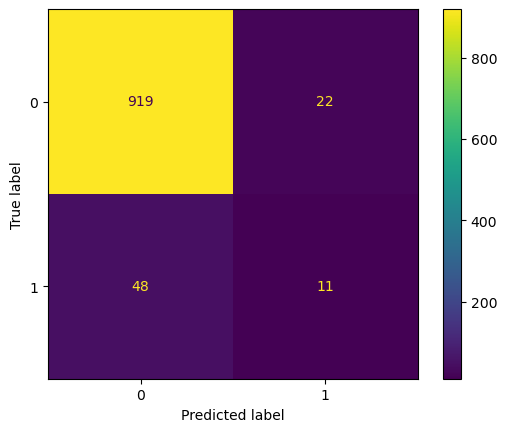

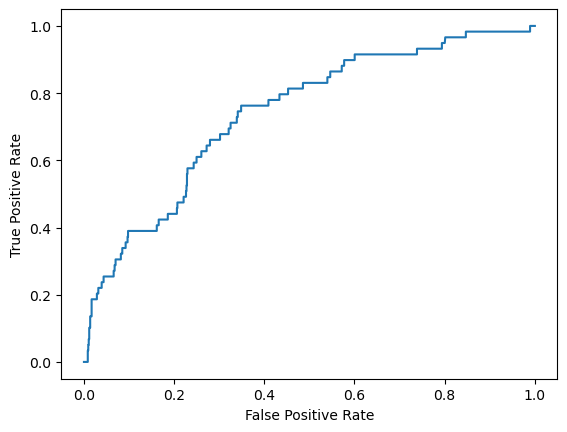

In [15]:
gen_metrics(result)

In [14]:
def computeAIC(feature_set):
    model = sm.GLM(y, X[list(feature_set)], family=sm.families.Binomial())
    result = model.fit()
    AIC = result.aic
    return {"model":result, "AIC":AIC}

def computeBIC(feature_set):
    model = sm.GLM(y, X[list(feature_set)], family=sm.families.Binomial())
    result = model.fit()
    BIC = result.aic + len(feature_set)*(np.log(len(y))-2)
    return {"model":result, "BIC":BIC}

def AICforward(features):
    remaining_features = [p for p in X.columns if p not in features]

    results = []
    
    for p in remaining_features:
        results.append(computeAIC(features+[p]))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    
    return best_model

def BICforward(features):
    remaining_features = [p for p in X.columns if p not in features]

    results = []
    
    for p in remaining_features:
        results.append(computeBIC(features+[p]))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['BIC'].argmin()]
    
    return best_model

In [15]:
%%time

AIC_fwd = pd.DataFrame(columns=["AIC", "model"])
features = ['intercept']
#features = []

for i in range(1,len(X.columns)):    
    AIC_fwd.loc[i] = AICforward(features)
    features = AIC_fwd.loc[i]["model"].model.exog_names
    
AIC_fwd

KeyboardInterrupt: 

Len= 15
Matched Prediction : All= 928
Matched Prediction : Negative= 18
Matched Prediction : Positive= 54
AUC= 0.733


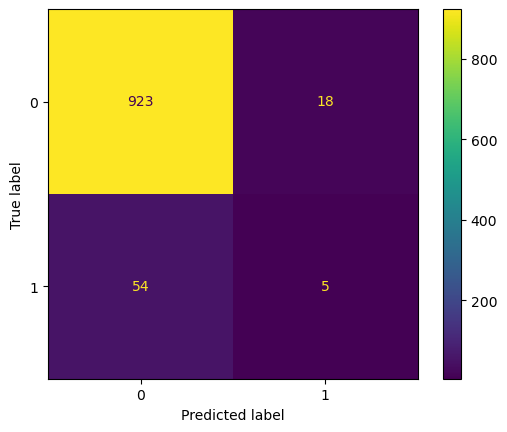

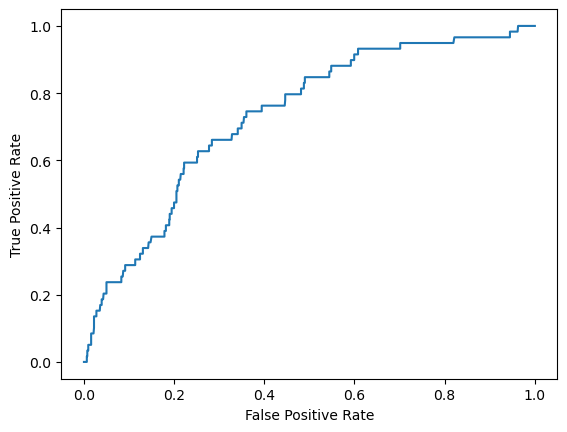

In [16]:
tmp_aic = AIC_fwd['AIC'].argmin() +1
model_aic = AIC_fwd.loc[tmp_aic]["model"]
gen_metrics(model_aic)


In [17]:
model_aic.summary()
len(model_aic.model.exog_names)

15

In [18]:
%%time

BIC_fwd = pd.DataFrame(columns=["BIC", "model"])
features = ['intercept']
#features = []

for i in range(1,len(X.columns)):    
    BIC_fwd.loc[i] = BICforward(features)
    features = BIC_fwd.loc[i]["model"].model.exog_names

BIC_fwd


KeyboardInterrupt: 

Len= 7
Matched Prediction : All= 934
Matched Prediction : Negative= 8
Matched Prediction : Positive= 58
AUC= 0.741


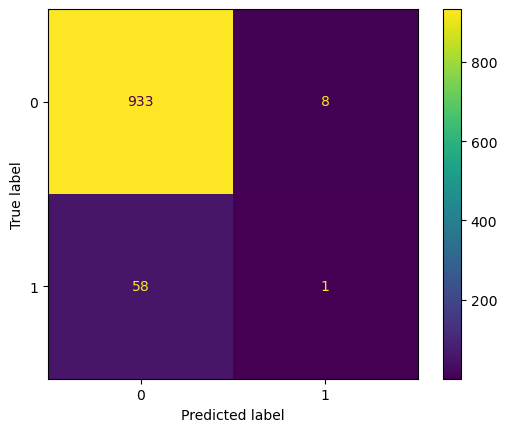

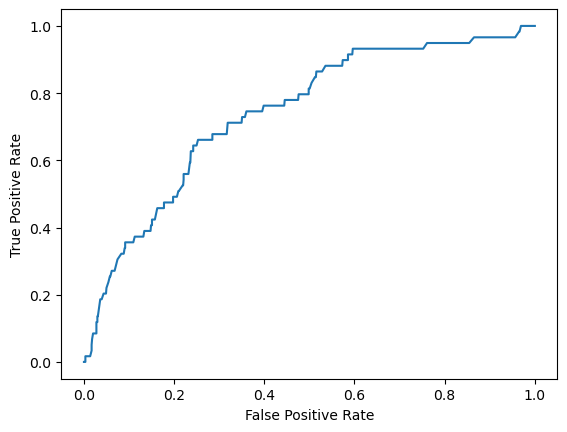

In [19]:
tmp_bic = BIC_fwd['BIC'].argmin() +1
model_bic = BIC_fwd.loc[tmp_bic]["model"]
gen_metrics(model_bic)


In [20]:
model_bic.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Purchase   No. Observations:                 4822
Model:                            GLM   Df Residuals:                     4815
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -973.85
Date:                Fri, 24 Nov 2023   Deviance:                       1947.7
Time:                        17:46:40   Pearson chi2:                 5.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.04844
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.3574      0.316    -13.805      0.000      -4.976      -3.739
PPERSAUT       0.2481      0.026      9.460      0.000       0.197       0.299
MOPLLAAG      -0.1556      0.028     -5.637      0.000      -0.210      -0.101
PBRAND         0.1823      0.033      5.445      0.000       0.117       0.248
APLEZIER       1.9010      0.445      4.269      0.000       1.028       2.774
MRELGE         0.1401      0.036      3.850      0.000       0.069       0.211
AWALAND       -1.8219      0.727     -2.506      0.012      -3.247      -0.397
==============================================================================
"""

In [131]:
def gen_metrics_sklearn(clf):
    #cols = list(clf.feature_names_in_)
    #X_test_filtered = X_test[cols]
    #y_pred_prob = result.predict(X_test_filtered)
    #clf.predict_proba(X_test)[:, 1]

    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    #y_pred_prob
    
    y_pred = y_pred_prob  > 0.25

    np.unique(y_pred, return_counts=True)

    print("Len=", np.sum(clf.coef_!=0))
    print("Matched Prediction : All=", np.sum((y_test == y_pred)))
    print("Matched Prediction : Negative=", np.sum((y_test != y_pred)[y_test == False]))
    print("Matched Prediction : Positive=", np.sum((y_test != y_pred)[y_test == True]))
    print("AUC=", round(roc_auc_score(y_test, y_pred_prob), 3))
    
    print("clf.coef_=", clf.coef_)

    from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

    #y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    cm_display = ConfusionMatrixDisplay(cm).plot()

    from sklearn.metrics import RocCurveDisplay, roc_curve

    fpr, tpr, xxxx = roc_curve(y_test, y_pred_prob)
    #print(fpr)
    #print(tpr)
    #print(xxxx)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [132]:
X_all = df.drop(['Purchase'], axis=1)

# allvars = X_all.columns
# design = MS(allvars)
# X_all = design.fit_transform(X_all)

X_all

X_test = X_all.iloc[0:1000, :]
y_test = y_all[0:1000]

X = X_all.iloc[1000:, :]
y = y_all[1000:]

X.shape

(4822, 85)

Len= 85
Matched Prediction : All= 929
Matched Prediction : Negative= 20
Matched Prediction : Positive= 51
AUC= 0.75
clf.coef_= [[ 0.09112008 -0.22732687  0.09624197  0.27474516 -0.39922761 -0.05381778
   0.00823236  0.05705081 -0.03652906  0.17363557  0.03708997  0.06332215
  -0.06200212 -0.12371691 -0.11319969  0.01612353 -0.04372456 -0.20072516
   0.1183813   0.11323766 -0.05438497  0.14710312  0.06215616  0.11612518
  -0.02312855 -0.05473185 -0.02139825  0.08236406  0.0075547  -0.49022067
  -0.46335007  0.1876281   0.14932093  0.10459969 -0.42694838 -0.48393121
   0.0844046   0.11136547  0.07291294  0.07538725 -0.15138614  0.13586083
   0.0517775   0.17345089 -0.17988257 -0.41218498  0.18010233  0.00948142
  -0.05449705 -0.2577545   0.13396326  0.09063632 -0.32055589 -0.10541483
  -0.27016588 -0.0185473   0.26423866  0.13362828  0.28407039 -0.02800002
   0.36802502  0.26999549 -0.07372337  0.0387558  -0.15423545  0.03843287
  -0.12600462  0.25977177 -0.07754055  0.09021261 -0.058916

85

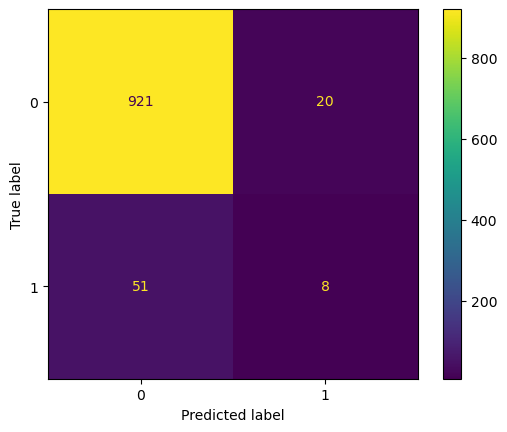

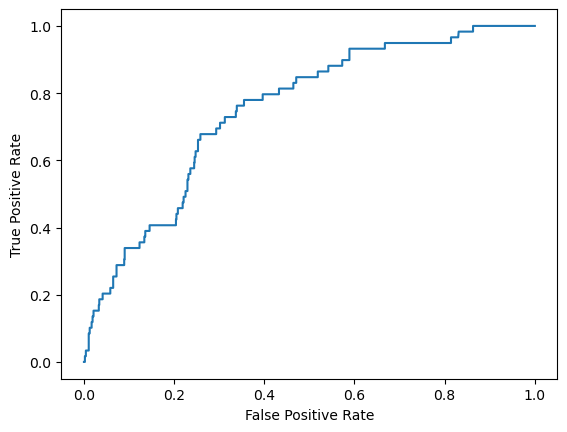

In [133]:
from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, Y_train)

#clf = LogisticRegression(penalty="l1", solver='liblinear', C=.004, random_state=0).fit(X, y)
clf = LogisticRegression(random_state=0, fit_intercept=True).fit(X, y)

#clf.feature_names_in_
#clf.predict(X[:2, :])
#clf.predict_proba(X[:2, :])
#clf.score(X, y)
#y_pred_prob = clf.predict_proba(X_test)[:, 1]
gen_metrics_sklearn(clf)


clf.feature_names_in_

np.size(clf.coef_)

Len= 11
Matched Prediction : All= 941
Matched Prediction : Negative= 0
Matched Prediction : Positive= 59
AUC= 0.588
clf.coef_= [[-0.03684266  0.          0.          0.          0.          0.
   0.          0.         -0.0052964  -0.00846534  0.          0.
   0.          0.          0.          0.          0.         -0.00810412
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.12088525
  -0.06650509 -0.03363158  0.          0.         -0.08846192 -0.01616055
   0.          0.          0.          0.          0.          0.
  -0.04269419  0.          0.          0.          0.03671815  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.    

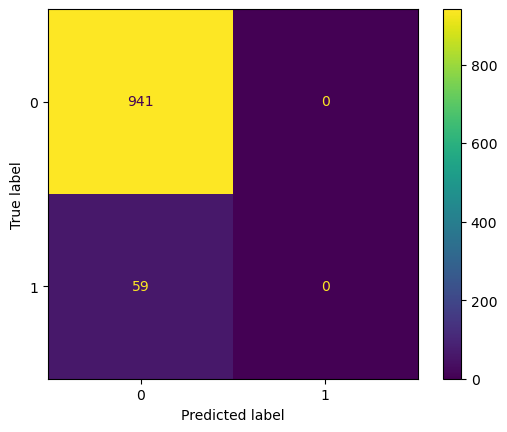

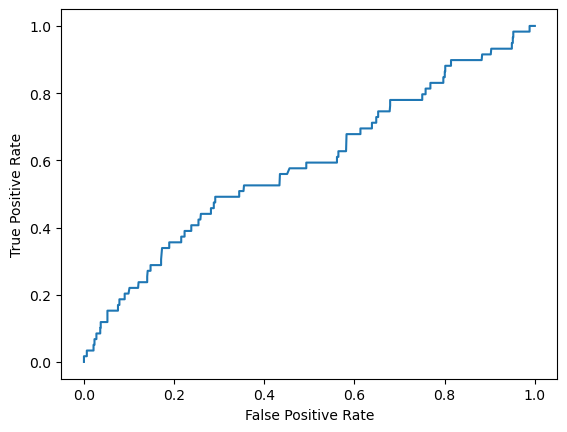

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, Y_train)
scaler = StandardScaler()
scaler = scaler.fit(X)

clf = LogisticRegression(penalty="l1", solver='liblinear', C=.004, random_state=0, fit_intercept=True).fit(X, y)
#clf = LogisticRegression(penalty="l1", solver='saga', C=.004, random_state=0, fit_intercept=True).fit(X, y)

#clf.feature_names_in_
#clf.predict(X[:2, :])
#clf.predict_proba(X[:2, :])
#clf.score(X, y)
#y_pred_prob = clf.predict_proba(X_test)[:, 1]

gen_metrics_sklearn(clf)
#np.sum(clf.coef_!=0)

#clf.coef_

#scaler.transform(X)
#X

In [121]:
clf.classes_

array([0, 1])

Len= 86
Matched Prediction : All= 930
Matched Prediction : Negative= 22
Matched Prediction : Positive= 48
AUC= 0.751
clf.coef_= [[ 2.01806695e+00  8.26515493e-02 -2.09340997e-01  9.07999173e-02
   2.65750879e-01 -3.57611674e-01 -4.63687948e-02  1.26505082e-02
   7.09347312e-02 -4.15884142e-02  1.73107818e-01  2.88914108e-02
   7.37460469e-02 -5.23522023e-02 -1.05369731e-01 -9.42605121e-02
   2.72435768e-02 -2.42111786e-02 -1.85303711e-01  1.17259491e-01
   7.56173432e-02 -6.09757950e-02  1.33865910e-01  4.95547900e-02
   9.74688139e-02 -2.36757172e-02 -5.51260657e-02 -2.74859690e-02
   7.74902089e-02  3.73023457e-03 -7.47289688e-01 -7.20105898e-01
   1.92638741e-01  1.58311147e-01  9.75795855e-02 -6.71005863e-01
  -7.29150207e-01  1.09433197e-01  1.30795346e-01  7.86445159e-02
   6.84851224e-02 -1.56843152e-01  1.67665029e-01  4.07291220e-02
   5.08730704e-01 -3.77398428e-01 -1.57466729e-01  1.91436573e-01
   2.86643077e+00 -2.37096246e-01 -1.23758613e+00  8.65197791e-01
   6.60121789e

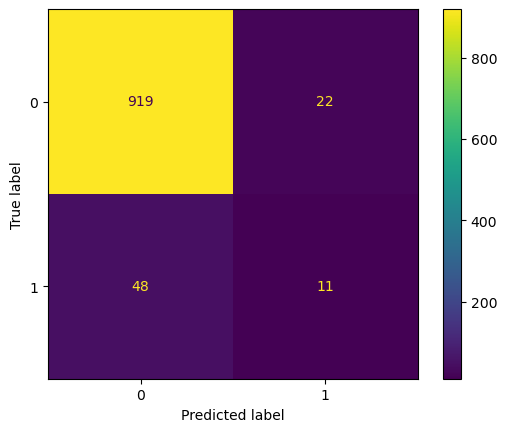

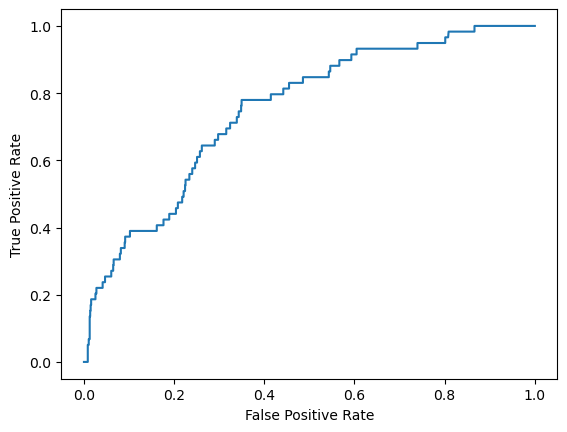

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l1", solver='liblinear', C=250, random_state=0).fit(X, y)

#y_pred_prob = clf.predict_proba(X_test)[:, 1]
gen_metrics_sklearn(clf)

#np.sum(clf.coef_==0)

In [24]:
np.sum(clf.coef_==0)

3

Len= 11
Matched Prediction : All= 941
Matched Prediction : Negative= 0
Matched Prediction : Positive= 59
AUC= 0.588
clf.coef_= [[-0.03684266  0.          0.          0.          0.          0.
   0.          0.         -0.0052964  -0.00846534  0.          0.
   0.          0.          0.          0.          0.         -0.00810412
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.12088525
  -0.06650509 -0.03363158  0.          0.         -0.08846192 -0.01616055
   0.          0.          0.          0.          0.          0.
  -0.04269419  0.          0.          0.          0.03671815  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.    

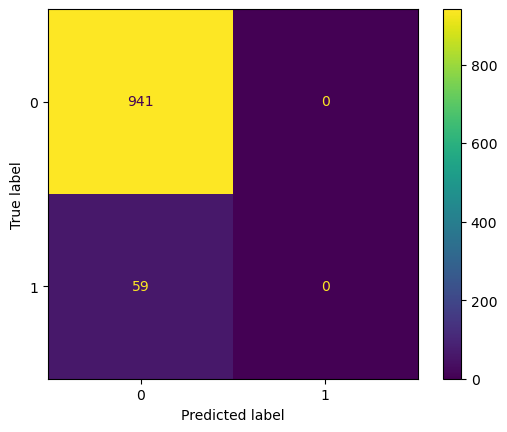

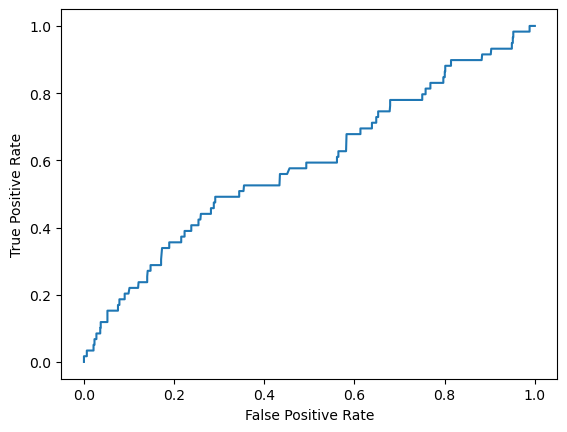

In [158]:
from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, Y_train)

#clf = LogisticRegression(penalty="l1", solver='liblinear', C=250, random_state=0).fit(X, y)
clf = LogisticRegression(solver='liblinear', penalty="l1", C=.004, random_state=0, fit_intercept=True).fit(X, y)
#clf = LogisticRegression(penalty="elasticnet", solver='liblinear', C=250).fit(X, y)

#clf.predict(X[:2, :])
#clf.predict_proba(X[:2, :])
#clf.score(X, y)
#y_pred_prob = clf.predict_proba(X_test)[:, 1]
gen_metrics_sklearn(clf)

In [26]:
#from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
#X, y = load_digits(return_X_y=True)
clf1 = Perceptron(random_state=0)
clf1.fit(X, y)
clf1.score(X, y)
#gen_metrics_sklearn(clf1)

0.9357113231024471

In [27]:
len(clf.feature_names_in_)

86

In [28]:
np.sum(clf.coef_==0)

3

In [29]:
clf1.coef_

array([[ -9.,   5., -25.,  -6.,  41., -65., -29.,  -9.,  29., -29.,  29.,
        -24.,  25., -26.,  -5., -43.,   8., -18., -54.,  30.,  33., -75.,
         45., -10.,  -4., -18., -32., -25.,  23.,   7., -59., -44.,  -5.,
         -5.,  -7., -41., -60.,   1.,  23.,  23.,  33., -37.,  19.,  -9.,
         19., -34., -58.,  67., -11., -27., -34.,  10., -28., -29.,  -8.,
        -23.,  -3.,  24.,  17.,  73.,   0.,  97.,  47.,  -3., -24.,  -4.,
         -3., -16.,  45.,  -9.,   0.,  -8.,   2., -19., -19., -11.,  63.,
         -2.,   9.,   1., -19.,   0.,  41.,  73.,  10.,   0.]])

In [30]:
X

,intercept,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
1000,1.0,40,1,5,3,10,1,1,5,3,...,0,0,0,0,1,0,0,0,0,0
1001,1.0,26,1,1,5,6,0,4,2,4,...,0,0,0,0,1,0,0,0,0,0
1002,1.0,10,1,4,2,3,2,6,0,3,...,0,0,0,0,0,0,0,0,0,0
1003,1.0,38,1,2,2,9,0,4,2,4,...,0,0,0,0,0,0,0,0,0,0
1004,1.0,39,2,3,3,9,1,5,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1.0,36,1,1,2,8,0,6,1,2,...,2,0,0,0,1,0,0,0,0,0
5818,1.0,35,1,4,4,8,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
5819,1.0,33,1,3,4,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
5820,1.0,34,1,3,2,8,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
X_t, y_t = load_iris(return_X_y=True)
log = LogisticRegression(penalty='l1', solver='liblinear')
iris_model = log.fit(X_t, y_t)

In [24]:
iris_model

LogisticRegression(penalty='l1', solver='liblinear')

### Logistic Regression with Lasso

In [154]:
from glmnet import LogitNet

m = LogitNet(alpha=1, lambda_path=[.004], standardize=True, fit_intercept=True)
X_tmp = scaler.transform(X)
clf = m.fit(X, y)

Len= 27
Matched Prediction : All= 935
Matched Prediction : Negative= 6
Matched Prediction : Positive= 59
AUC= 0.746
clf.coef_= [[ 0.          0.          0.          0.0691884   0.          0.
   0.          0.01283464 -0.03436561  0.0496381  -0.01464535  0.
   0.          0.          0.          0.00503197  0.         -0.08281945
   0.          0.         -0.08669566  0.00251885  0.          0.
   0.          0.          0.          0.          0.         -0.0084939
   0.          0.04395833  0.          0.          0.          0.
  -0.00256023  0.          0.          0.00235775 -0.02002809  0.08516756
   0.02575682  0.09004781  0.          0.          0.1692651   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.0767176   0.          0.10092134  0.
   0.          0.          0.          0.          0.          0.
  -0.481821    0.18467272  0.          0.          0.          0.
  -0.01742882  0.          0.          0.03542513  0.     

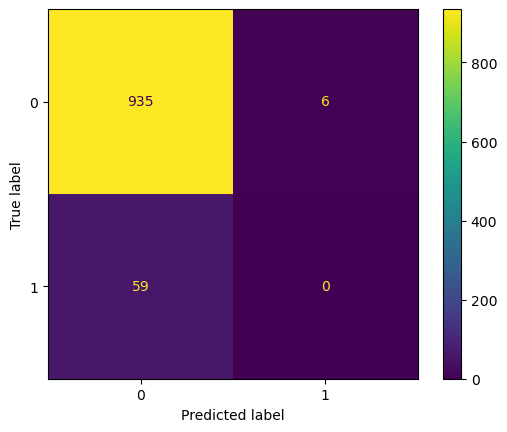

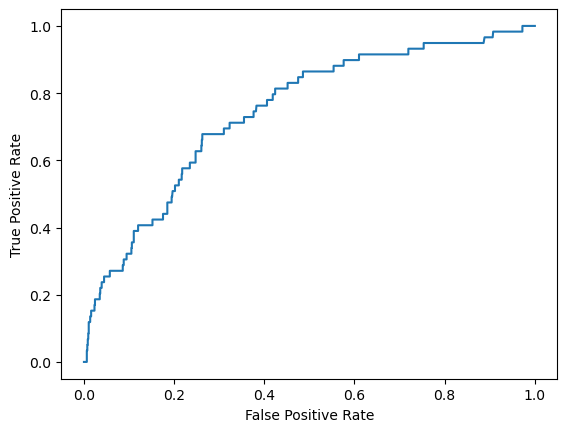

In [155]:
#def gen_metrics_sklearn(clf):
#cols = list(clf.feature_names_in_)
#X_test_filtered = X_test[cols]

X_test_tmp = scaler.transform(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
#y_pred_prob

y_pred = y_pred_prob  > 0.25

np.unique(y_pred, return_counts=True)

print("Len=", np.sum(clf.coef_!=0))
print("Matched Prediction : All=", np.sum((y_test == y_pred)))
print("Matched Prediction : Negative=", np.sum((y_test != y_pred)[y_test == False]))
print("Matched Prediction : Positive=", np.sum((y_test != y_pred)[y_test == True]))
print("AUC=", round(roc_auc_score(y_test, y_pred_prob), 3))

print("clf.coef_=", clf.coef_)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, xxxx = roc_curve(y_test, y_pred_prob)
#print(fpr)
#print(tpr)
#print(xxxx)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()